# Dimensionality Reduction by Extracting Principal Components

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#https://archive.ics.uci.edu/ml/datasets/Wine
df = pd.read_csv(r'wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:, 1:]

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_ 
# PCA 1 and PCA 2

array([0.36196226, 0.18763862])

In [12]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.362 0.188]


In [13]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T
# 0 means PCA 1 and 1 is PCA 2
# no. of observation is 178 now we convert it into 6 PCA so now use only 6

#PCA 1 is maximum compare to the other

,0,1
Alcohol,0.134,-0.496
Malic acid,-0.257,-0.220
Ash,-0.011,-0.256
Alcalinity of ash,-0.234,0.096
Magnesium,0.158,-0.266
Total phenols,0.392,-0.064
Flavanoids,0.416,-0.010
Nonflavanoid phenols,-0.279,-0.028
Proanthocyanins,0.331,-0.007
Color intensity,-0.114,-0.548


No preceived idea of the number of PCAs we want

In [14]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.transform(X_train_sc)

array([[-3.00694856, -0.44098187, -0.841225  , ...,  0.092763  ,
        -0.12752086, -0.16916663],
       [ 0.47849211,  1.99040077, -0.6896192 , ...,  0.36421707,
         0.55035386, -0.11084717],
       [ 1.40660818,  0.77327604, -1.54703099, ..., -0.67773067,
        -0.2117173 ,  0.04575819],
       ...,
       [ 4.22538352, -2.40143008, -1.0453208 , ...,  0.01439273,
        -0.08514755, -0.09809057],
       [-1.75808282,  1.56188578, -0.13557016, ..., -0.8637719 ,
        -0.3434664 ,  0.29253833],
       [-0.0931339 ,  1.25456427,  0.83849232, ..., -0.35838506,
        -0.0283026 , -0.27300095]])

In [16]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.362 0.188 0.117 0.076 0.07  0.046 0.036 0.026 0.022 0.02  0.018 0.013
 0.008]


In [17]:
# till 100% so set None in n_components
np.cumsum(pca.explained_variance_ratio_) # cumulative sum of 
#example of  cumsum
#a = [4,6,12]

#np.cumsum(a)
#array([4, 10, 22])

array([0.36196226, 0.54960087, 0.66616635, 0.74195608, 0.81239361,
       0.85791879, 0.89376135, 0.9202245 , 0.94197392, 0.96155739,
       0.9791806 , 0.99241886, 1.        ])

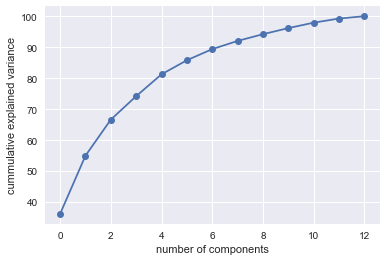

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.,marker='o')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

In [ ]:
# 90% of we wamt to use 6 observation